# Data Analyst Program - Interim Project 

<hr/>

### The AdventureWorks demo database serves as a great platform to practice SQL and data analytics skills. In this project, We are working as a team to answer a set of questions using the AdventureWorks dataset, a demo dataset maintained by Microsoft.

## Project Instructions and Deliverables

1.	What are the regional sales in the best performing country?

2.	What is the relationship between annual leave taken and bonus?

3.	What is the relationship between Country and Revenue?

4.	What is the relationship between sick leave and Job Title?

5.	What is the relationship between store trading duration and revenue?

6.	What is the relationship between the size of the stores, number of employees and revenue?

### Question 1 - What are the regional sales in the best performing country?
<hr/>
<p>To tackel this question, I followed these steps:<br>

* On SSMS I created a view as below:
 
	SELECT st.[CountryRegionCode] AS CountryCode<br>
		   ,pr.[Name] AS CountryName<br>
		   ,st.[Name] AS Region<br>
		   ,CAST(SUM(sh.SubTotal) AS INT) AS TotalSales<br>
		  FROM [AdventureWorks2019].[Sales].[SalesTerritory] AS st<br>
		  LEFT JOIN [AdventureWorks2019].[Sales].[SalesOrderHeader] AS sh<br>
			 ON st.TerritoryID = sh.TerritoryID<br>
		  LEFT JOIN [AdventureWorks2019].[Person].[CountryRegion] pr<br>
			 ON st.CountryRegionCode = pr.CountryRegionCode<br>
		  WHERE sh.OrderDate BETWEEN '2013-01-01' AND '2013-12-31'<br>
		  GROUP BY st.[TerritoryID], st.[CountryRegionCode], st.Name, st.[Group], pr.Name
<br><br>

* In order to find the best performing country, I used the pandas iloc function to select the first row and 
<em>CountryCode</em> column and stored the result on <em>k_region</em> variable
* Then I subset the dataframe column <em>CountryCode</em> with <em>k_region</em> variable to filter only the regions that belongs to the most performing country 

<p> To start off the project, we are setting up a connection to my SQL Server instance and database. Here this is a Trusted Connection and does not require login details</p>

In [66]:
# Importing the required libaries
import pyodbc
import pandas as pd
from matplotlib import pyplot as plt

conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-J5R1BFO;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

<p>Now that I have a connection, we are using the read_sql_query method to create a dataframe from the server connection. 
</p>

In [117]:
# this will read the querie and create a new dataframe object 
# as I was not able to use the Order By clause within the Sql view, I ordered the TotalSales column within Pandas
df1 = pd.read_sql_query('SELECT * FROM SalesRegionV ORDER BY TotalSales DESC', conn)

# print the head of the dataframe object
print(df1)

  CountryCode     CountryName          Region  TotalSales
0          US   United States       Southwest     9116540
1          CA          Canada          Canada     6229518
2          US   United States       Northwest     6015175
3          AU       Australia       Australia     4230664
4          FR          France          France     3806506
5          GB  United Kingdom  United Kingdom     3633423
6          US   United States         Central     2994225
7          US   United States       Northeast     2631260
8          DE         Germany         Germany     2565221
9          US   United States       Southeast     2399947


C:\Users\cmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


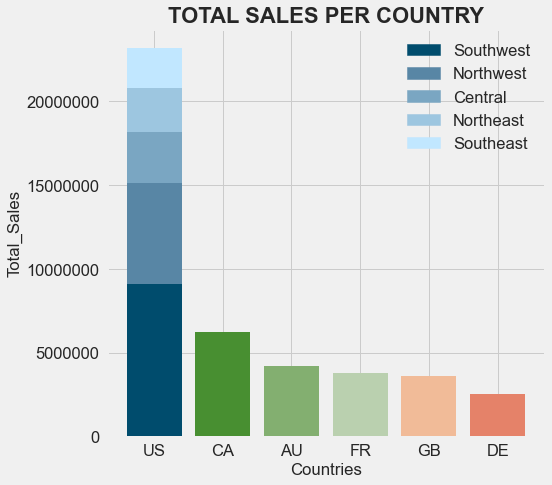

In [118]:
import numpy as np
# select US on CountryCode column and TotalSales in US
us_x = df1.iloc[0, 0]
us_bool = df1['CountryCode'] == us_x
df_us = df1[us_bool]
us_total = np.array(df_us['TotalSales'])
us_regions = np.array(df_us['Region'])


# select CA on CountryCode column and TotalSales in CA
ca_x = df1.iloc[1, 0]
ca_bool = df1['CountryCode'] == ca_x
df_ca = df1[ca_bool]
ca_total = df_ca['TotalSales']

# select AU on CountryCode column and TotalSales in AU
au_x = df1.iloc[3, 0]
au_bool = df1['CountryCode'] == au_x
df_au = df1[au_bool]
au_total = df_au['TotalSales']

# select FR on CountryCode column and TotalSales in FR
fr_x = df1.iloc[4, 0]
fr_bool = df1['CountryCode'] == fr_x
df_fr = df1[fr_bool]
fr_total = np.array(df_fr['TotalSales'])

# select GB on CountryCode column and TotalSales in GB
gb_x = df1.iloc[5, 0]
gb_bool = df1['CountryCode'] == gb_x
df_gb = df1[gb_bool]
gb_total = df_gb['TotalSales']

# select DE on CountryCode column and TotalSales in DE
de_x = df1.iloc[8, 0]
de_bool = df1['CountryCode'] == de_x
df_de = df1[de_bool]
de_total = df_de['TotalSales']

# create the plot
import matplotlib.pyplot as plt
plt.ticklabel_format(style='plain') 
plt.style.use('fivethirtyeight')
# plot bars in stack manner US 
plt.bar(us_x, us_total[0], color='#004c6d')
plt.bar(us_x, us_total[1], bottom=us_total[0], color='#5886a5')
plt.bar(us_x, us_total[2], bottom=us_total[0] + us_total[1], color='#7aa6c2')
plt.bar(us_x, us_total[3], bottom=us_total[0] + us_total[1] + us_total[2] , color='#9dc6e0')
plt.bar(us_x, us_total[4], bottom=us_total[0] + us_total[1] + us_total[2] + us_total[3], color='#c1e7ff')
#adding legend to US regions
colors = {'Southwest':'#004c6d', 'Northwest':'#5886a5', 'Central':'#7aa6c2', 'Northeast':'#9dc6e0', 'Southeast': '#c1e7ff'} 
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
 
# plot bars in CA
plt.bar(ca_x, ca_total, color='#488f31')

# plot bars in AU
plt.bar(au_x, au_total, color='#83af70')

# plot bars in FR
plt.bar(fr_x, fr_total, color='#bad0af')

# plot bars in GB
plt.bar(gb_x, gb_total, color='#f1bb98')

# plot bars in DE
plt.bar(de_x, de_total, color='#e58269')
 
plt.xlabel("Countries")
plt.ylabel("Total_Sales")
plt.title("TOTAL SALES PER COUNTRY", fontsize=22, fontweight='bold')
plt.show()

 <p> As the table was ordered in descending order, the country with the best sales performance went to the top row, that is the <strong>United States</strong>.<br>
Then I used slicing with the iloc function to select the indice of the first row and column of the dataframe which is the <em>CountryCode</em>.<br>
<p>With the best performing country stored in the variable <em>K_region</em>, I used the slicing again to subset the <em>CountryCode</em> column with the <em>K_region</em> boolean values and stored the result in the <strong>USregions</strong> variable.<br>
<p>Then I created a dataframe <strong>df_r</strong> with all the regions that contain <strong>US</strong> as country code.</pr>


In [ ]:
# select the first row on CountryCode column 
k_region = df.iloc[0, 0]
# subset the dataframe with the boolean result in k_region
USregions = df['CountryCode'] ==k_region
df_r = df[USregions]
print(df_r)


  CountryCode    CountryName     Region  TotalSales
0          US  United States  Southwest     9116540
2          US  United States  Northwest     6015175
6          US  United States    Central     2994225
7          US  United States  Northeast     2631260
9          US  United States  Southeast     2399947


<p>Then I created the the variables <em>regional</em> and <em>total</em> to extract the values fron the <em>df_r</em> dataframe to use on the bar plot</p>

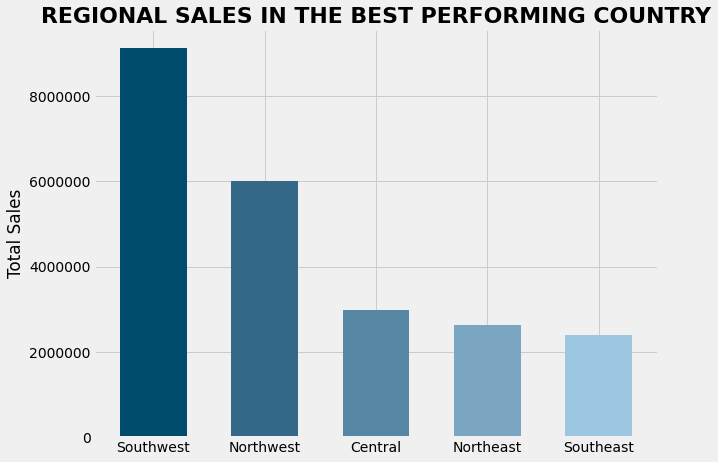

In [ ]:
# create the variable region for the Region values
us_region = df_r.iloc[:, 2]
# Create the variable total for the TotalSales values
total = df_r.iloc[:, 3]

# create the plot
import matplotlib.pyplot as plt
plt.ticklabel_format(style='plain')
# mixing two styles
plt.style.use('fivethirtyeight')
plt.bar(us_region, total, width=0.6, color=['#004c6d', '#346888', '#5886a5', '#7aa6c2', '#9dc6e0'])
plt.title("REGIONAL SALES IN THE BEST PERFORMING COUNTRY", fontsize= 22, fontweight='bold')
plt.ylabel("Total Sales")
plt.rcParams["figure.figsize"] = (9,7)
plt.show()

### Question 2 - What is the relationship between annual leave taken and bonus?

<hr/>
<p>The process of answering the question was completed as follows:<br>

* The columns to be analysed were found and because they were from different tables, a query was made using a join with a following query:

    select h.BusinessEntityID, h.VacationHours, s.Bonus<br>
    from HumanResources.Employee as h<br>
    join Sales.SalesPerson as s<br>
    on h.BusinessEntityID = s.BusinessEntityID<br>

* Then I created a new dataframe object from the querie

In [ ]:
# selecting the query result in df2 variable
df2 = pd.read_sql_query('SELECT * FROM AnnualLeave_bonnusV', conn)

# print the head of the dataframe object
print(df2)

    VacationHours   Bonus
0              14     0.0
1              38  4100.0
2              27  2000.0
3              24  2500.0
4              33   500.0
5              29  6700.0
6              22  5000.0
7              26  3550.0
8              31  5000.0
9              23  3500.0
10             39  3900.0
11             20     0.0
12             36  5650.0
13             21     0.0
14             35    75.0
15             37  5150.0
16             34   985.0


C:\Users\cmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


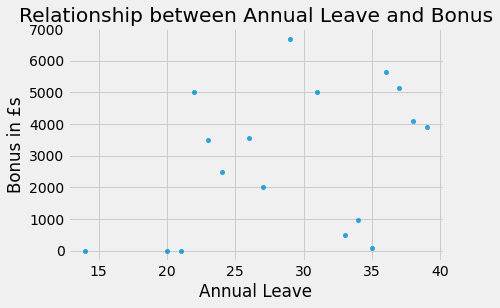

In [ ]:
# scatter plot

import seaborn as sns
df2.plot.scatter(x = 'VacationHours', y = 'Bonus', alpha=0.8)
plt.title('Relationship between Annual Leave and Bonus')
plt.xlabel('Annual Leave')
plt.ylabel('Bonus in £s')
plt.savefig('Q2scatter.png', dpi=300)
plt.show()

C:\Users\cmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


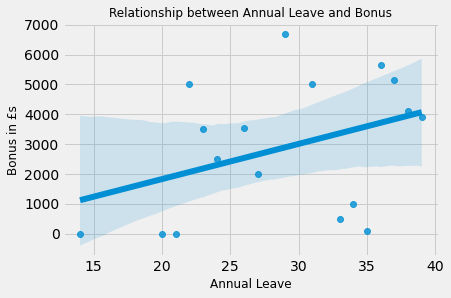

In [ ]:
# plotting the relationship between vacation hours and bonus

x = df2['VacationHours']
y = df2['Bonus']
graph = sns.regplot(x, y)
graph.set_xlabel('Annual Leave', size = 12 )
graph.set_ylabel('Bonus in £s', size = 12 )
graph.set_title('Relationship between Annual Leave and Bonus', size = 12 )
plt.savefig('Q2regr.png', dpi=300)

In [ ]:
# calculating the correlation between the variables
corr = df2['VacationHours'].corr(df2['Bonus'])
print(corr)

0.3821074616559863


<p>We can see that there is a weak positive relatitionship between vacation hours and bonus</p>

### Question 3 - What is the relationship between Country and Revenue?

<hr/>

* First I created the below query on SSMS to find out the annual revenue total for each country in all stores<br>


SELECT SUM(d.AnnualRevenue) AS Annual_Revenue,<br>
       a.CountryRegionName<br>
FROM Sales.vStoreWithAddresses AS a<br>
INNER JOIN Sales.vStoreWithDemographics AS d<br>
 ON a.BusinessEntityID = d.BusinessEntityID<br>
GROUP BY CountryRegionName<br>


* Then I created a new dataframe object from the querie

In [ ]:
# This will read the view and create a new dataframe object from the query results.
df3 = pd.read_sql_query('SELECT * FROM AnnualRevenue_Country ORDER BY Annual_Revenue DESC', conn)

# Now I want to print the head of my dataframe object
df3.head()

C:\Users\cmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Annual_Revenue,CountryRegionName
0,68980000.0,United States
1,18040000.0,Canada
2,6800000.0,United Kingdom
3,6650000.0,France
4,6420000.0,Australia


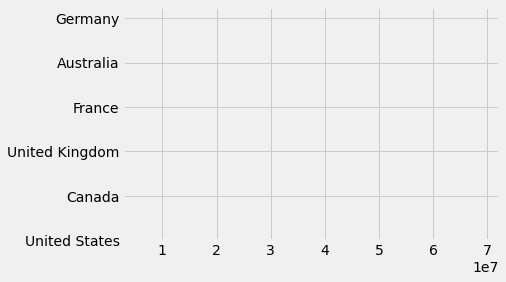

In [ ]:
xlabel = 'Annual Revenue'
ylabel = 'Countries'
plt.bar(df3['Annual_Revenue'], df3['CountryRegionName'], color= 'blue')
plt.show()

<p> Then I created a new query to select the store in each country with the highest annual revenue <p> 

SELECT a.Name, 
       MAX(AnnualRevenue) AS Revenue, 
       CountryRegionName 
FROM Sales.vStoreWithAddresses AS a
INNER JOIN Sales.vStoreWithDemographics AS d
ON a.BusinessEntityID = d.BusinessEntityID
/** the where clause compares all stores in each country to one store that generated the most revenue**/
WHERE CountryRegionName = 'United Kingdom'
GROUP BY CountryRegionName, a.Name, AnnualRevenue
ORDER BY CountryRegionName, AnnualRevenue DESC;

C:\Users\cmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


                    Store_Name   Revenue CountryRegionName
0        Bike Part Wholesalers   80000.0         Australia
1             Budget Toy Store  300000.0         Australia
2        Cross-town Parts Shop   80000.0         Australia
3  Cycle Parts and Accessories   80000.0         Australia
4          Eastside Cycle Shop   80000.0         Australia


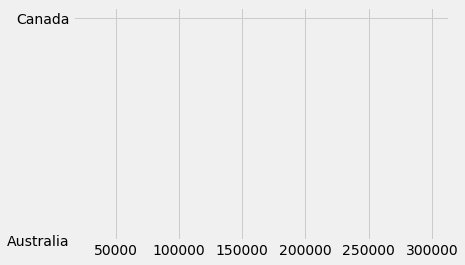

In [ ]:
df3_2= pd.read_sql_query('SELECT TOP 100 * FROM highest_revenue_storev', conn)

# Now I want to print the head of my dataframe object
print(df3_2.head())
xlabel = 'Annual Revenue'
ylabel = 'Countries'
plt.bar(df3_2['Revenue'], df3_2['CountryRegionName'], color= 'blue')
plt.show()

<p> Then I created a query to find out the numbers of stores in each country</p>

SELECT CountryRegionName,<br>
       COUNT(Name) AS Store<br>
FROM Sales.vStoreWithAddresses<br>
GROUP BY CountryRegionName;<br>

In [ ]:
df3_3 = pd.read_sql_query('SELECT TOP 100 * FROM Num_Storesv', conn)

# Now I want to print the head of my dataframe object
print(df3_3.head())
plot = df3_3.plot.pie(y='stores', figsize=(5, 5), color = 'blue')
plt.show()

### Question 4 - What is the relationship between sick leave and Job Title?

<hr/>

In [ ]:
query = """
SELECT e.BusinessEntityID AS id
      ,e.JobTitle AS job_title
      ,d.Name AS job_department
      ,d.GroupName AS department_category
      ,CAST(e.OrganizationNode AS varchar(100)) AS organisation_node
      ,e.OrganizationLevel AS organisation_level
      ,e.SickLeaveHours AS sick_leave_hours
  FROM HumanResources.Employee AS e
  JOIN HumanResources.EmployeeDepartmentHistory AS edh
       ON e.BusinessEntityID = edh.BusinessEntityID
  JOIN HumanResources.Department AS d
       ON edh.DepartmentID = d.DepartmentID
 WHERE edh.EndDate IS NULL
"""

df4 = pd.read_sql(query, conn)
df4.head()

C:\Users\cmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,job_title,job_department,department_category,organisation_node,organisation_level,sick_leave_hours
0,1,Chief Executive Officer,Executive,Executive General and Administration,None,NaN,69
1,2,Vice President of Engineering,Engineering,Research and Development,/1/,1.0,20
2,3,Engineering Manager,Engineering,Research and Development,/1/1/,2.0,21
3,4,Senior Tool Designer,Tool Design,Research and Development,/1/1/1/,3.0,80
4,5,Design Engineer,Engineering,Research and Development,/1/1/2/,3.0,22


### Data Understanding
Check DataFrame shape

In [ ]:
df4.shape

(290, 7)

Generate an overview of the dataframe

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   290 non-null    int64  
 1   job_title            290 non-null    object 
 2   job_department       290 non-null    object 
 3   department_category  290 non-null    object 
 4   organisation_node    289 non-null    object 
 5   organisation_level   289 non-null    float64
 6   sick_leave_hours     290 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 16.0+ KB


In [ ]:
df.describe().round(1)

,TerritoryID,Year,TotalSales
count,5831.0,5831.0,5831.0
mean,6.4,2012.7,18838.3
std,2.9,1.0,72734.2
min,1.0,2011.0,2.0
25%,4.0,2012.0,2182.0
50%,7.0,2013.0,4074.0
75%,9.0,2013.0,7677.0
max,10.0,2014.0,1027924.0


In [ ]:
df4.describe(include="object")

,job_title,job_department,department_category,organisation_node
count,290,290,290,289
unique,67,16,6,289
top,Production Technician - WC60,Production,Manufacturing,/1/
freq,26,179,185,1


In [ ]:
# check for null values
na_in_columns = df4.isna().sum()

if na_in_columns.sum() > 0:
    print(f"NA count: {na_in_columns.sum()}")

    columns_with_na = df4.columns[na_in_columns == 1]
    print(f"Column(s) containing NA: {', '.join(columns_with_na)}")
else:
    print("No NA values")

NA count: 2
Column(s) containing NA: organisation_node, organisation_level


In [ ]:
# check for duplicate values in id column, which should be unique
print(f"Duplicate row count: {df4.duplicated(subset='id').sum()}")

Duplicate row count: 0


### Observations:

1. 290 non-duplicate records containing 67 unique job titles in 16 departments across 6 categories
2. Columns **id**, **job_title**, **job_department**, **department_category**, and **organisation_level** contain categorical data
3. Column **sick_leave_hours** contains numerical data
4. Column **organisation_node** contains hierarchical information
5. Columns **organisation_node** and **organisation_level** contain NULL values

### Data Preparation
NULL value in organisation_level is CEO. 
- Level 1 Employees answer directly to CEO
- Level 2 employees answer to Level 1 employees
- Level 3 to Level 2
- Level 4 to Level 3 

Reversing the pattern, it makes sense to consider the CEO a Level 0 employee.
We are not performing an analysis that uses organisation_node, so the NULL value there is ignored.

In [ ]:
df4["organisation_level"] = df4["organisation_level"].fillna(0).apply(int)

**id**, **job_title**, **job_department**, **department_category**, and **organisation_level** contain categorical data and should be stored using the pd.Categorical data type.

In [ ]:
to_convert = ["id", "job_title", "job_department", "department_category", 'organisation_level']
df4[to_convert] = df4[to_convert].astype("category")

### How is sick leave distributed?

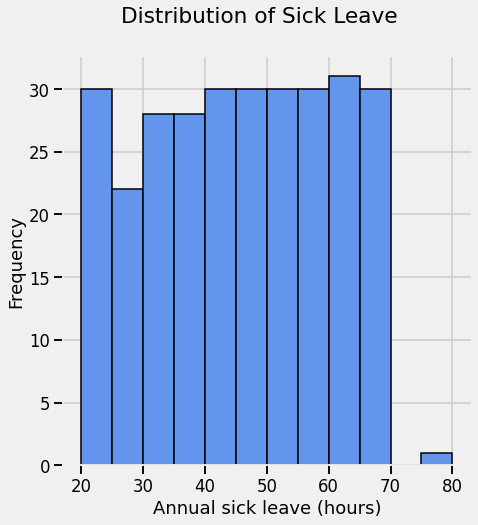

In [ ]:
import seaborn as sns
from matplotlib import rcParams

rcParams["figure.figsize"] = (7, 7) # default plot size
sns.set_context("talk") # default label size etc.

fig, ax = plt.subplots()
sns.despine()

### Plotting ###
df4.plot.hist(
    y="sick_leave_hours",
    bins=range(20, 81, 5),
    facecolor="CornflowerBlue",
    edgecolor="black",
    ax=ax,
    legend=False,
)

### Formatting ###
ax.set(
    box_aspect=1,
    xticks=range(20, 81, 10),
    xlabel="Annual sick leave (hours)",
)
fig.suptitle("Distribution of Sick Leave")

### Saving ###
fig.savefig(
    "Q4. Sick Leave histogram.png",
    bbox_inches="tight",
    facecolor='white',
    dpi=150,
)

### Observations: 
* Almost flat distribution between 20 and 70 hours
* Dip between 25 and 40 hours
* One outlier at 80 hours

### How is Sick Leave related to Job Title?

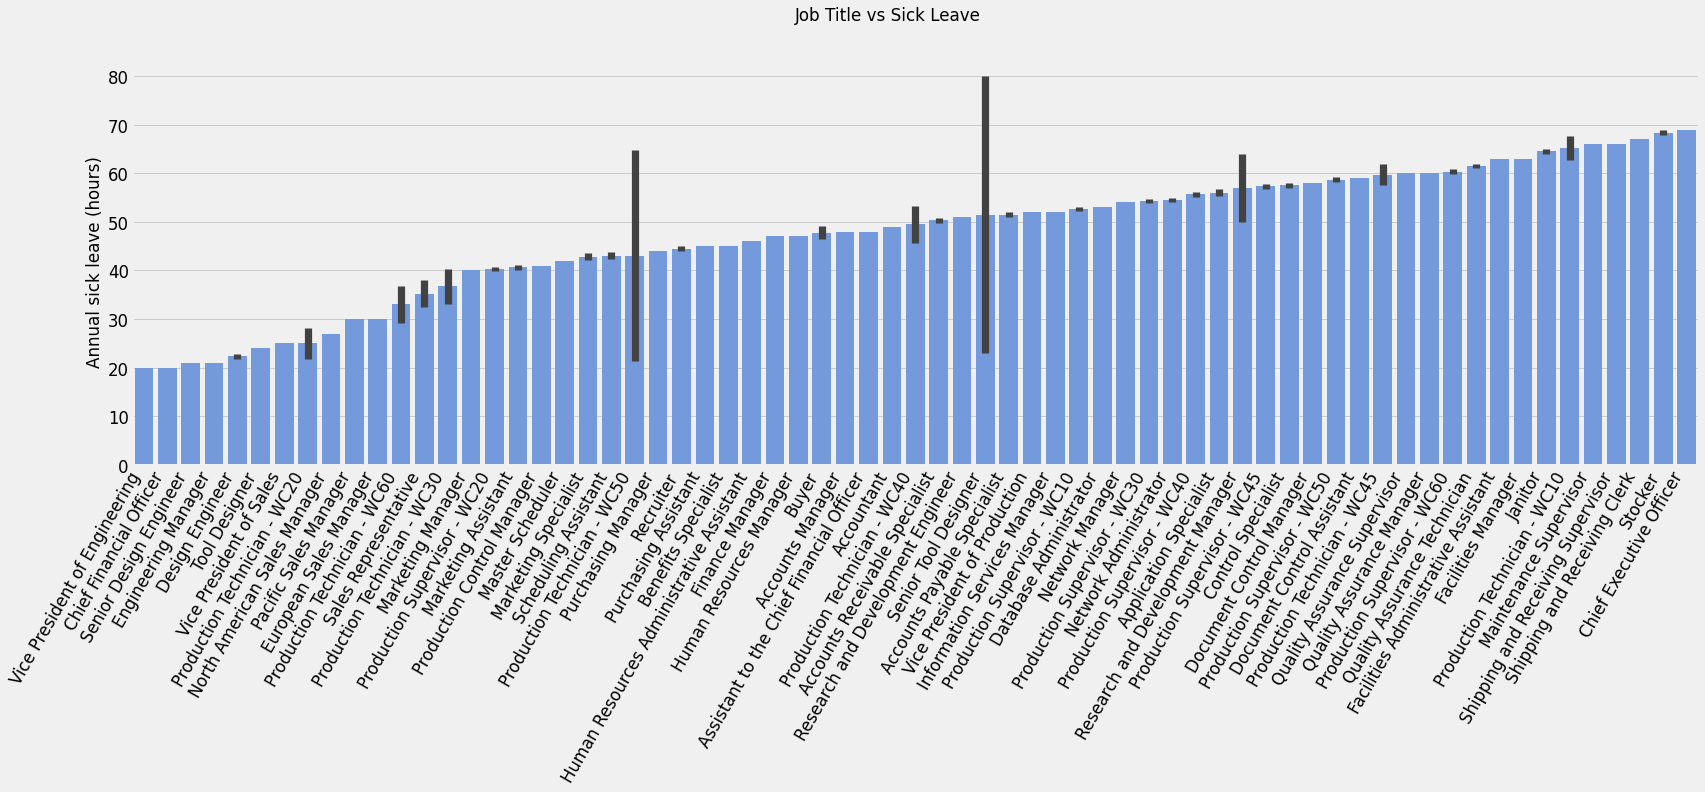

In [69]:
fig, ax = plt.subplots(figsize=(25, 7))
sns.despine()

group_order = (
    df4.groupby("job_title")
    .mean()
    .sort_values("sick_leave_hours")
    .index
)

### Plotting ###
sns.barplot(
    y="sick_leave_hours",
    x="job_title",
    data=df4,
    order=group_order,
    color='CornflowerBlue',
    dodge=False,
    estimator=np.mean,
    ci="sd",
    ax=ax,
)

### Formatting ###
plt.xticks(rotation=60, ha="right")

ax.set(
    xlabel=None, 
    ylabel="Annual sick leave (hours)"
)
fig.suptitle('Job Title vs Sick Leave')

### Saving ###
fig.savefig(
    "Q4. Sick Leave vs Job Title.png",
    bbox_inches="tight",
    facecolor='white',
    dpi=150,
)

In [70]:
job_count = df4.groupby("job_title", as_index=False).agg({"id": "count"})

unique_job_count = job_count.shape[0]
print(f"There are {unique_job_count} unique jobs at AdventureWorks")

one_person_roles = (job_count["id"] == 1).sum()
one_person_percent = int(round(100 * (one_person_roles / unique_job_count)))
print(
    f"Of those, {one_person_roles} are job titles held by only one person ({one_person_percent}%)"
)

five_or_more = (job_count["id"] >= 5).sum()
five_plus_percent = int(round(100 * (five_or_more / unique_job_count)))
print(
    f"There are only {five_or_more} job titles held by five or more people ({five_plus_percent}%)"
)

There are 67 unique jobs at AdventureWorks
Of those, 28 are job titles held by only one person (42%)
There are only 10 job titles held by five or more people (15%)


### Observations:
* 42% of jobs have only a single employee in the role
* Only 15% of job titles have five or more people in that role


Analysis by job title is unfortunately too granular to provide useful insights, and so we have to find another way to produce results. Two options present themselves: analysis by Organisation Level and analysis by Job Department / Department Category

### How is Sick Leave related to Organisation Level?

During data preparation, the CEO was defined to have Organisation Level 0. Level 1 employees answer directly to the CEO, Level 2 employees answer to Level 1, and so on.

In [71]:
(
    df4.groupby("organisation_level")
    .agg({"sick_leave_hours": [np.mean, np.std, np.median, "count"]})
    .round(1)
)

sick_leave_hours                   
                               mean   std median count
organisation_level                                    
0                              69.0   NaN   69.0     1
1                              34.8  15.2   32.5     6
2                              45.3  10.2   44.0    27
3                              46.8  12.2   49.0    66
4                              45.0  15.6   45.0   190

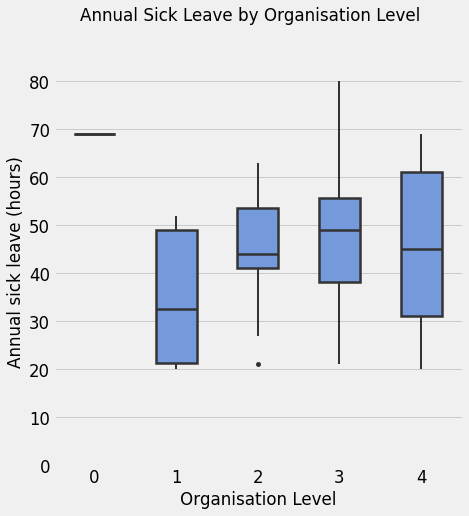

In [73]:
fig, ax = plt.subplots()
sns.despine()

### Plotting ###
sns.boxplot(
    x="organisation_level",
    y="sick_leave_hours",
    data=df4,
    color="CornflowerBlue",
    width=0.5,
    showcaps=False,
    flierprops={
        "marker": "o",
        "markerfacecolor": "#333",
        "markeredgecolor": "none",
    },
    boxprops={"linewidth": 2.5, "edgecolor": "#333"},
    medianprops={"linewidth": 2.5, "color": "#333"},
    whiskerprops={"linewidth": 2, "color": "#333"},
    ax=ax,
)

### Formatting ###
ax.set(
    box_aspect=1,
    ylim=(0, 85),
    xlabel='Organisation Level',
    ylabel="Annual sick leave (hours)",
    # title="Annual Sick Leave by Organisation Level",
)
fig.suptitle("Annual Sick Leave by Organisation Level")

### Saving ###
fig.savefig(
    "Q4. Sick Leave vs Organisation Level.png",
    bbox_inches="tight",
    facecolor='white',
    dpi=150,
)

### Observations:

* CEO has significantly higher sick leave than other employees
* Mean and Median sick leave peak in Level 3 employees and decrease as level increases: higher responsibility employees are afforded less sick leave
* No employee has fewer than 20 hours annual sick leave

### How is Sick Leave related to Department Category?

Each of the 67 unique jobs in AdventureWorks belongs to one of 16 job departments, which in turn belong to one of 6 department categories. We first investigate the relationship between sick leave and department category, then sick leave and job department.

In [74]:
group_order = (
    df4.groupby("department_category")
    .agg({"sick_leave_hours": [np.mean, np.std, np.median, "count"]})
    .round(1)
    .sort_values(('sick_leave_hours', 'mean'))
)
group_order

sick_leave_hours                   
                                                 mean   std median count
department_category                                                     
Research and Development                         35.4  19.8   23.5    14
Sales and Marketing                              36.3   5.2   37.0    27
Manufacturing                                    44.2  15.0   43.0   185
Executive General and Administration             52.9   9.0   52.0    35
Inventory Management                             53.8  10.1   48.5    18
Quality Assurance                                59.7   1.7   60.0    11

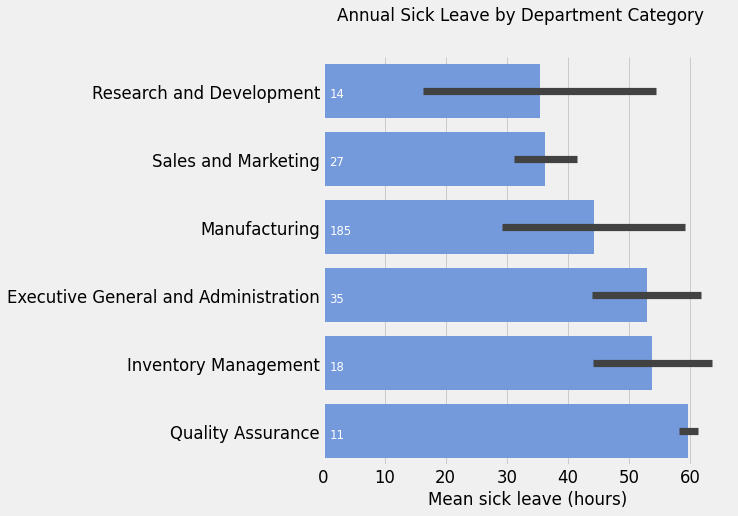

In [75]:
fig, ax = plt.subplots()
sns.despine()

### Plotting ###
sns.barplot(
    x="sick_leave_hours",
    y="department_category",
    data=df4,
    ax=ax,
    estimator=np.mean,
    ci='sd',
    color='CornflowerBlue',
    order=group_order.index,
)

### Formatting ###
ax.set(
    box_aspect=1,
    xlabel="Mean sick leave (hours)",
    ylabel=None,
)
fig.suptitle("Annual Sick Leave by Department Category")

for index, group_size in enumerate(group_order[('sick_leave_hours', 'count')]):
    ax.annotate(
        str(group_size),
        (1, index + 0.1),
        color='White',
        fontsize='small'
    )

### Saving ###
fig.savefig(
    "Q4. Sick Leave vs Department Category.png",
    bbox_inches="tight",
    facecolor='white',
    dpi=150,
)

### Observations:

* Manufacturing is by far the largest category, containing 185 of 290 employees (64%)
* Quality Assurance has both the highest median sick leave and the smallest range

### How is Sick Leave related to Job Department?

In [76]:
group_order = (
    df4.groupby("job_department")
    .agg({"sick_leave_hours": [np.mean, np.std, np.median, "count"]})
    .round(1)
    .sort_values(('sick_leave_hours', 'mean'))
)
group_order

sick_leave_hours                   
                                       mean   std median count
job_department                                                
Engineering                            21.5   1.0   21.5     6
Sales                                  33.6   4.1   33.5    18
Tool Design                            37.8  28.2   24.0     4
Marketing                              41.8   1.4   42.0     9
Production Control                     42.5   1.0   42.5     6
Production                             44.3  15.2   43.0   179
Executive                              44.5  34.6   44.5     2
Human Resources                        45.5   1.0   45.5     6
Purchasing                             47.0   1.9   47.0    12
Finance                                49.5   1.6   49.5    10
Research and Development               54.0   6.7   51.0     4
Information Services                   54.5   1.6   54.5    10
Document Control                       58.2   0.8   58.0     5
Quality Assurance                      61.0   0.9   61.0     6
Facilities and Maintenance             64.3   1.1   64.0     7
Shipping and Receiving                 67.5   1.0   67.5     6

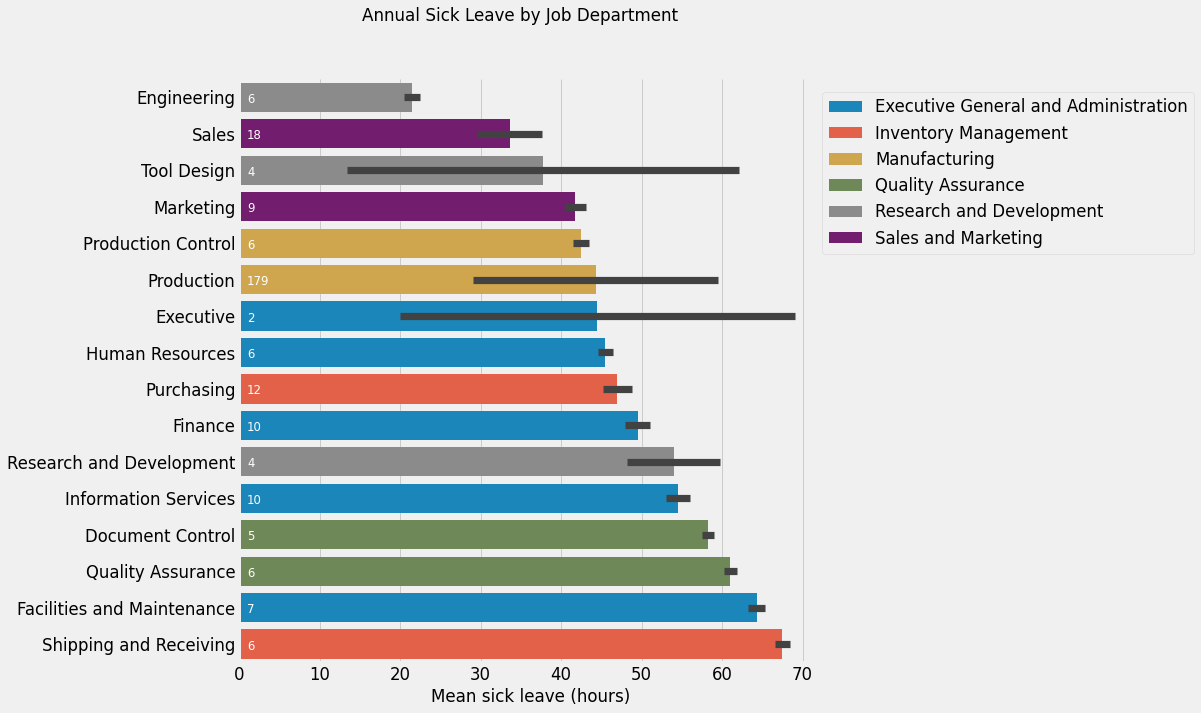

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.despine()

### Plotting ###
sns.barplot(
    x="sick_leave_hours",
    y="job_department",
    data=df4,
    ax=ax,
    estimator=np.mean,
    ci='sd',
    hue="department_category",
    dodge=False,
    order=group_order.index,
)

### Formatting ###
ax.set(
    box_aspect=1,
    xlabel="Mean sick leave (hours)",
    ylabel=None,
    title=None,
)
ax.legend(loc=(1, 0.7))
fig.suptitle("Annual Sick Leave by Job Department")

for index, group_size in enumerate(group_order[('sick_leave_hours', 'count')]):
    ax.annotate(
        str(group_size),
        (1, index + 0.15),
        color='White',
        fontsize='small'
    )

### Saving ###
fig.savefig(
    "Q4. Sick Leave vs Job Department.png",
    bbox_inches="tight",
    facecolor='white',
    dpi=150,
)

### Observations:

Breakdown by Job Department probably most useful: very small standard deviation for all departments with 5 or more people, with the expection of Production

### Question 5 - What is the relationship between store trading duration and revenue?

<hr/>

<p>To answer this question regarding the data from AdventureWorks2019, we must consider which data we need to import into the Jupyter Notebook to visualise with Python. The relevant data to answer this question is 'YearOpened' and 'AnnualRevenue', both of which can be found in the view 'Sales.vStoreWithDemographics'</p>

In [80]:
df5 = pd.read_sql_query('SELECT * FROM Sales.vStoreWithDemographics', conn) 

C:\Users\cmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<p>It is now time to visualise the data: something important to note when looking through the view on SQLServer is that a lot of the data contains the exact same values, thus it is a good idea to make use of the matploblib feature 'alpha', which allows for a transparency factor to be added to each datapoint.</p>

<AxesSubplot:xlabel='YearOpened', ylabel='AnnualRevenue'>

<Figure size 576x396 with 0 Axes>

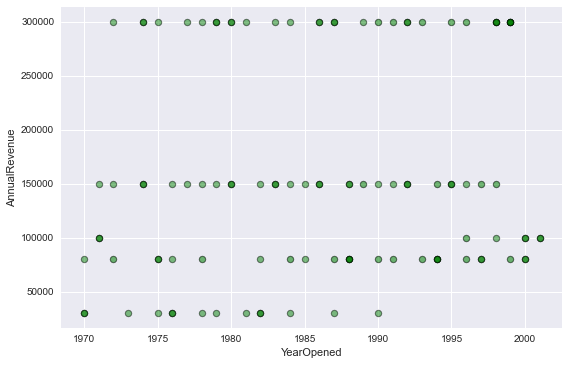

In [81]:
plt.style.use('seaborn')
plt.tight_layout()
df5.plot.scatter(x='YearOpened',y='AnnualRevenue',s=40,c='green', edgecolor='black', linewidth=1, alpha=0.1) 

<p>As we can see from the scatter plot above showing the data of annual revenue for each store against the year that each store opened, there is no direct correlation between the two. Stores that have opened recently can achieve high values of revenue and vice versa, this is found similarly with stores opened decades ago.</p>

In [82]:
correlation = df.corr()
print(correlation)

             TerritoryID      Year  TotalSales
TerritoryID     1.000000  0.007434   -0.119995
Year            0.007434  1.000000   -0.013809
TotalSales     -0.119995 -0.013809    1.000000


Above we can see the correlation values for each relationship in our dataframe. For year opened and annual revenue, we can see the correlation is very low (0.133635) unlike some other metrics such as sq footage of the store and it's annual revenue which is highly correlated with a value of 0.996531.

### Question 6 - What is the relationship between store size, number of employees and revenue?

<hr/>

<p>To answer this question regarding the data from AdventureWorks2019, we must consider which data we need to import into the Jupyter Notebook to visualise with Python. The relevant data to answer this question is 'YearOpened' and 'AnnualRevenue', both of which can be found in the view 'Sales.vStoreWithDemographics'</p>

In [83]:
from matplotlib.colors import LinearSegmentedColormap

rcParams["figure.figsize"] = (7, 7) # default plot size
sns.set_context("talk") # default label size etc.

Connect to AdventureWorks database & retrieve data

In [84]:
query = """
SELECT BusinessEntityID AS id
      ,AnnualRevenue AS annual_revenue
      ,SquareFeet AS square_footage
      ,NumberEmployees AS employee_count
  FROM Sales.vStoreWithDemographics
"""

store = pd.read_sql(query, conn)
store.head()

C:\Users\cmdas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,annual_revenue,square_footage,employee_count
0,292,80000.0,21000,13
1,294,80000.0,18000,14
2,296,80000.0,21000,15
3,298,80000.0,18000,16
4,300,80000.0,21000,17


### Data Understanding

Check DataFrame shape

In [85]:
store.shape

(701, 4)

Generate an overview of the dataframe

In [86]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              701 non-null    int64  
 1   annual_revenue  701 non-null    float64
 2   square_footage  701 non-null    int64  
 3   employee_count  701 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 22.0 KB


In [87]:
store.describe().round(1)

,id,annual_revenue,square_footage,employee_count
count,701.0,701.0,701.0,701.0
mean,1035.9,158473.6,40014.3,40.5
std,477.7,98095.2,24445.6,29.5
min,292.0,30000.0,6000.0,2.0
25%,642.0,80000.0,20000.0,16.0
50%,992.0,150000.0,37000.0,35.0
75%,1342.0,300000.0,72000.0,64.0
max,2051.0,300000.0,80000.0,100.0


In [88]:
store.nunique()

id                701
annual_revenue      5
square_footage     39
employee_count     76
dtype: int64

Check for null values

In [89]:
na_in_columns = store.isna().sum()

if na_in_columns.sum() > 0:
    print(f"NA count: {na_in_columns.sum()}")

    columns_with_na = store.columns[na_in_columns == 1]
    print(f"Column(s) containing NA: {', '.join(columns_with_na)}")
else:
    print("No NA values")

No NA values


Check for duplicate values in id column, which should be unique

In [90]:
print(f"Duplicate row count: {store.duplicated(subset='id').sum()}")

Duplicate row count: 0


### Observations:

* Very small number of possible values for **annual_revenue** due to AdventureWorks being a generated database. Revenue is technically continuous data, so will be treated as such for this analysis

### Data Preparation

**id** is categorical rather than numerical data

In [91]:
store['id'] = store['id'].astype("category")

### Exploratory Data Analysis

Pairwise relationships between variables

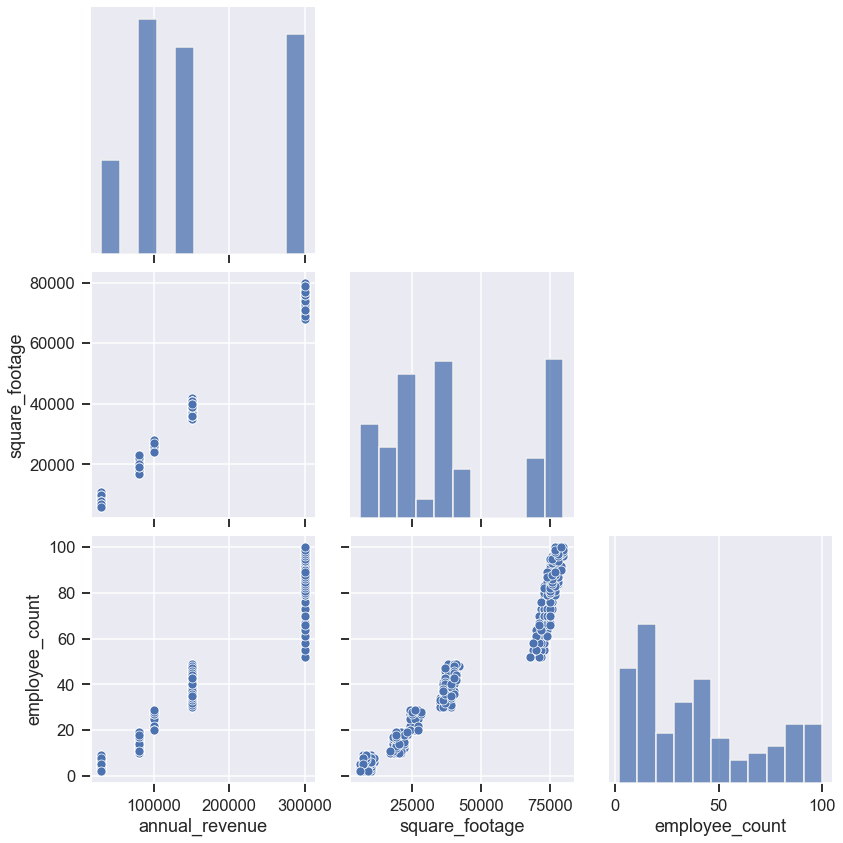

In [92]:
sns.pairplot(
    data=store,
    corner=True,
    height=4,
    aspect=1
)

Correlation heatmap

In [93]:
correlation = store.corr()
correlation

,annual_revenue,square_footage,employee_count
annual_revenue,1.000000,0.996531,0.958107
square_footage,0.996531,1.000000,0.971782
employee_count,0.958107,0.971782,1.000000


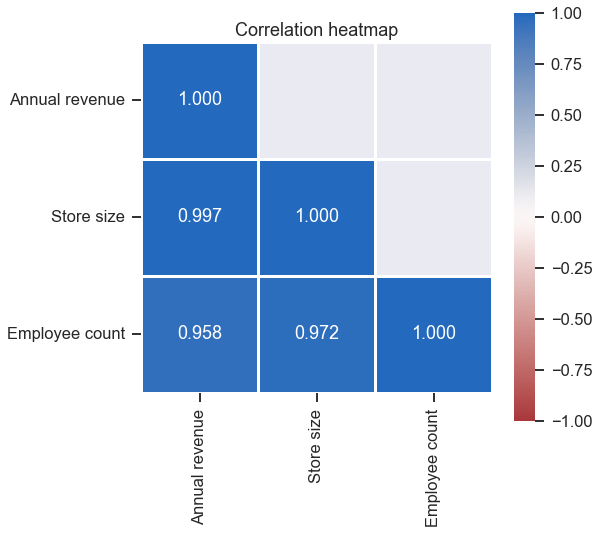

In [94]:
fig, ax = plt.subplots()

### Plotting ###
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask, k=1)] = True

sns.heatmap(
    correlation,
    annot=True,
    fmt='3.3f',
    vmin=-1,
    vmax=1,
    cmap='vlag_r',
    square=True,
    mask=mask,
    linewidths=2.5,
    ax=ax
)

### Formatting ###
ticks = [0.5, 1.5, 2.5]
labels = ['Annual revenue', 'Store size', 'Employee count']
ax.set(
    title='Correlation heatmap',
    xticks=ticks,
    xticklabels=labels,
    yticks=ticks,
    yticklabels=labels,
)

### Saving ###
fig.savefig(
    'Q6. Correlation heatmap.png',
    bbox_inches="tight",
    facecolor='white',
    dpi=150,
)

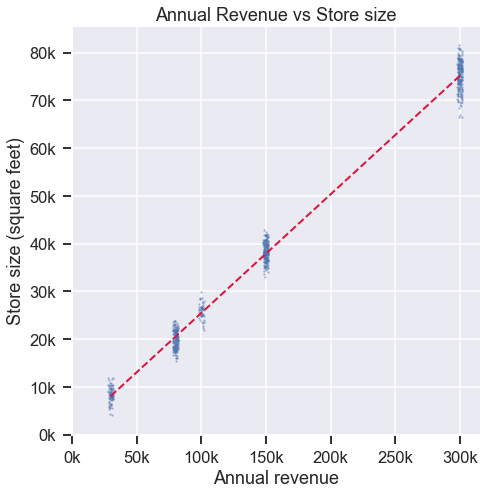

In [95]:
# scatter plot

fig, ax = plt.subplots()
sns.despine()

### Plotting ###
sns.regplot(
    x="annual_revenue",
    y="square_footage",
    data=store,
    ax=ax,
    ci=None,
    x_jitter=2000, # Relatively small jitter to show data clusters
    y_jitter=2000,
    scatter_kws=dict(
        alpha=0.5,
        s=5,
        linewidth=0,
    ),
    line_kws=dict(
        linestyle='--',
        linewidth=2,
        color='Crimson'
    ),
)

### Formatting ###
x_ticks = np.arange(0, 301, 50)
y_ticks = np.arange(0, 81, 10)
ax.set(
    box_aspect=1,
    xticks=x_ticks * 1000,
    xticklabels=[f"{x}k" for x in x_ticks],
    yticks=y_ticks * 1000,
    yticklabels=[f"{x}k" for x in y_ticks],
    xlabel='Annual revenue',
    ylabel='Store size (square feet)',
    title='Annual Revenue vs Store size',
)

### Saving ###
fig.savefig(
    'Q6. Annual Revenue vs Store size.png',
    bbox_inches="tight",
    facecolor='white',
    dpi=150,
)

In [96]:
### Regression ###
slope, intercept = np.polyfit(
    x=store["annual_revenue"],
    y=store["square_footage"],
    deg=1
)

print(f"Slope: {slope}\nIntercept: {intercept}")

Slope: 0.24833853208067522
Intercept: 659.1618704104995


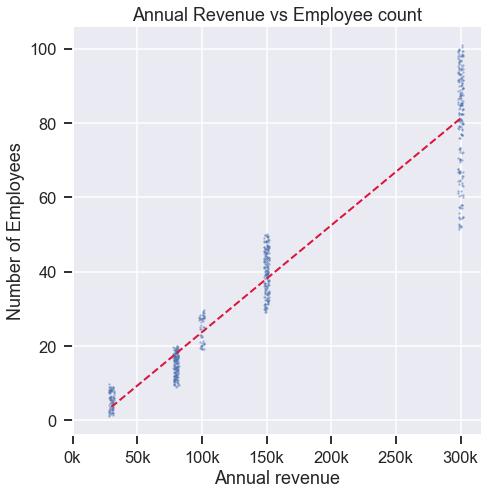

In [97]:
fig, ax = plt.subplots()
sns.despine()

sns.regplot(
    x="annual_revenue",
    y="employee_count",
    data=store,
    ax=ax,
    ci=None,
    x_jitter=2000, # Relatively small jitter to show data clusters
    y_jitter=1,
    scatter_kws=dict(
        alpha=0.5,
        s=5,
        linewidth=0,
    ),
    line_kws=dict(
        linestyle='--',
        linewidth=2,
        color='Crimson'
    ),
)

### Formatting ###
x_ticks = np.arange(0, 301, 50)
ax.set(
    box_aspect=1,
    xticks=x_ticks*1000,
    xticklabels=[f"{x}k" for x in x_ticks],
    xlabel='Annual revenue',
    ylabel='Number of Employees',
    title='Annual Revenue vs Employee count',
)

### Saving ###
fig.savefig(
    'Q6. Annual Revenue vs Employee count.png',
    bbox_inches="tight",
    facecolor='white',
    dpi=150,
)

In [98]:
### Regression ###
slope, intercept = np.polyfit(
    x=store["annual_revenue"],
    y=store["employee_count"],
    deg=1
)

print(f"Slope: {slope}\nIntercept: {intercept}")

Slope: 0.0002877959125532897
Intercept: -5.098784487225386


https://stackoverflow.com/questions/64633018/removing-white-or-light-colors-from-matplotlib-color-palette

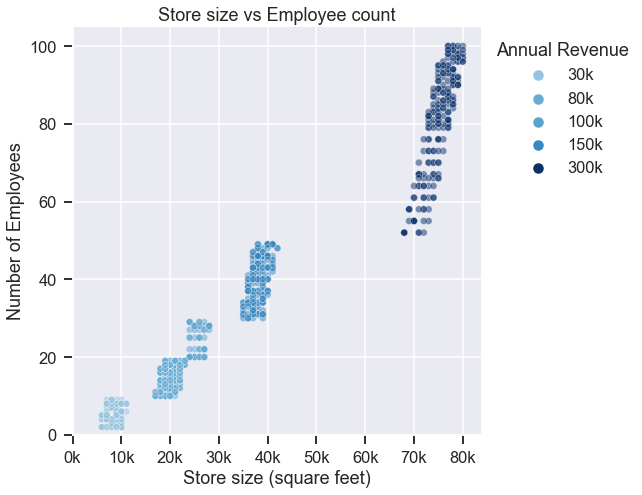

In [99]:
# 0.0 on Blues is almost pure white
colors = plt.cm.Blues(np.linspace(0.4, 1.0, 10))
new_Blues = LinearSegmentedColormap.from_list("new_Blues", colors)

fig, ax = plt.subplots()
sns.despine()

### Plotting ###
sns.scatterplot(
    x="square_footage",
    y="employee_count",
    data=store,
    ax=ax,
    hue='annual_revenue',
    palette=new_Blues,
    alpha=0.5,
    s=50
)


### Formatting ###
x_ticks = np.arange(0, 81, 10)
ax.set(
    box_aspect=1,
    xticks=x_ticks*1000,
    xticklabels=[f"{x}k" for x in x_ticks],
    ylim=(0, 105),
    xlabel='Store size (square feet)',
    ylabel='Number of Employees',
    title='Store size vs Employee count',
)
legend_values = sorted(store.annual_revenue.unique())
ax.legend(
    handles=ax._children[1:], # Some random extra dot in the default legend for some reason
    labels=[f"{int(x/1000)}k" for x in legend_values],
    title='Annual Revenue',
    loc='best',
    bbox_to_anchor=(1, 1),
)


### Saving ###
fig.savefig(
    'Q6. Store size vs Employee count.png',
    bbox_inches="tight",
    facecolor='white',
    dpi=150,
)


In [100]:
### Regression ###
slope, intercept = np.polyfit(
    x=store["square_footage"],
    y=store["employee_count"],
    deg=1
)

print(f"Slope: {slope}\nIntercept: {intercept}")

Slope: 0.001171348358096566
Intercept: -6.361371532965329


### Observations:

* Almost perfect positive linear correlations between all three variables, meaning if we know any of the three we can make accurate predications about the other two
* **Do not assume correlation means causation**